In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:
# sales = pd.read_csv('/content/drive/MyDrive/Pricing/sales.csv')
# products = pd.read_csv('/content/drive/MyDrive/Pricing/products.csv')
# stores = pd.read_csv('/content/drive/MyDrive/Pricing/stores.csv')
# data = pd.merge(pd.merge(sales,products, on = 'Product_ID', how='left'), stores, on='Store_ID', how= 'left')

data = pd.read_csv('/content/drive/MyDrive/Pricing/toys_data.csv').drop('Unnamed: 0',axis=1)


In [3]:

data['Product_Cost'] = data['Product_Cost'].replace('[\$,]', '', regex=True).astype(float)
data['Product_Price'] = data['Product_Price'].replace('[\$,]', '', regex=True).astype(float)
data.head()

toys = data[data['Product_Category'] == 'Toys']

def get_subcat(name):
  name = name.strip()
  if name in ['Action Figure','Animal Figures','Dinosaur Figures','Mr. Potatohead']:
    return 'Figurine'
  elif name in ['Hot Wheels 5-Pack','Lego Bricks']:
    return 'Collectibles'
  elif name in ['Dino Egg']:
    return 'Others'
  else:
    return 'Plushies'

toys.loc[:, 'Product_subcategory'] = toys['Product_Name'].apply(get_subcat)

<ipython-input-3-61b5a2408d65>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toys.loc[:, 'Product_subcategory'] = toys['Product_Name'].apply(get_subcat)


In [ ]:
data.groupby('Product_Category').agg({'Units': ['mean','sum'], 'Product_Cost' : ['mean'], 'Product_Price' : ['mean'] })

Units         Product_Cost Product_Price
                       mean     sum         mean          mean
Product_Category                                              
Art & Crafts       1.475369  325574     6.496695      9.026239
Electronics        1.353951  134075     9.729308     17.097468
Games              1.239908  194673     8.117288     11.539049
Sports & Outdoors  1.287152  169043    10.123106     13.306376
Toys               1.207809  267200    14.790549     18.879720

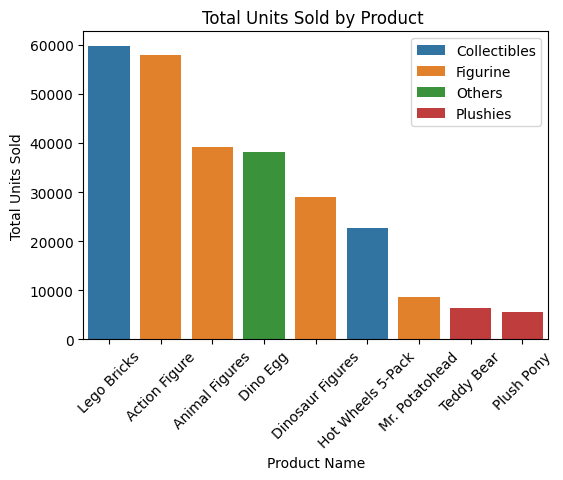

In [ ]:
demand_by_category = toys.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).reset_index()
demand_by_category['Product_subcategory'] = demand_by_category['Product_Name'].apply(get_subcat)


plt.figure(figsize=(6, 4))


sns.barplot(data=demand_by_category,hue='Product_subcategory' , x='Product_Name',y='Units')
plt.title('Total Units Sold by Product ')
plt.xlabel('Product Name')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.legend()
plt.show()

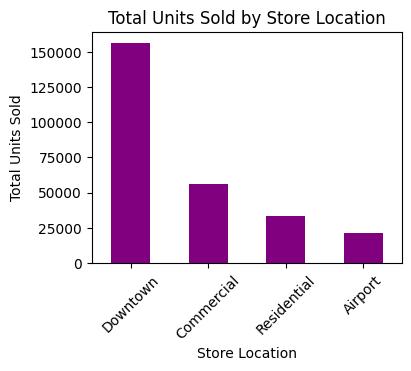

<ipython-input-32-d660d3a3bb48>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toys['Date'] = pd.to_datetime(toys['Date'])
<ipython-input-32-d660d3a3bb48>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toys['Month'] = toys['Date'].dt.to_period('M').astype('str')


In [ ]:



demand_by_location = toys.groupby('Store_Location')['Units'].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 3))
demand_by_location.plot(kind='bar', color='purple')
plt.title('Total Units Sold by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

toys['Date'] = pd.to_datetime(toys['Date'])
toys['Month'] = toys['Date'].dt.to_period('M').astype('str')







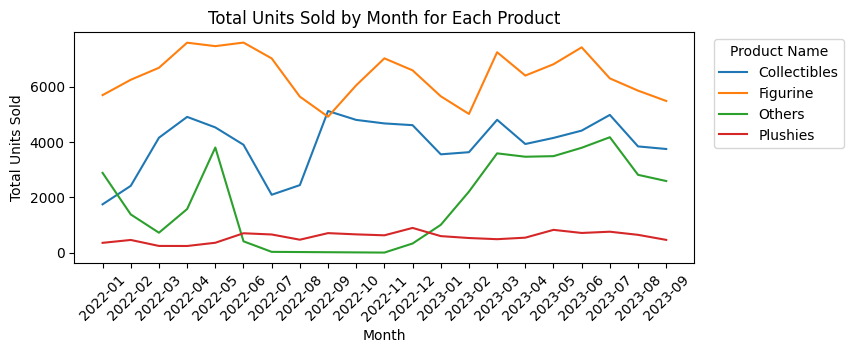

In [ ]:
demand_by_product_month = toys.groupby(['Product_subcategory', 'Month'])['Units'].sum().reset_index()

plt.figure(figsize=(8, 3))
for product in demand_by_product_month['Product_subcategory'].unique():
    subset = demand_by_product_month[demand_by_product_month['Product_subcategory'] == product]
    plt.plot(subset['Month'], subset['Units'], label=product)

plt.title('Total Units Sold by Month for Each Product')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Name',loc='upper left',bbox_to_anchor=(1.02, 1))
plt.show()

In [ ]:
# Filter the dataset for the "Figurine" subcategory
figurines_data = toys[toys['Product_subcategory'] == 'Others']

# Group by Product Name to calculate average price, total units sold, and other statistics
figurine_stats = figurines_data.groupby('Product_Name').agg({
    'Product_Price': ['mean', 'min', 'max'],
    'Units': 'sum',
    'Product_Cost': 'mean'
}).reset_index()

# Calculating total sales for each product
figurine_stats['Total_Sales'] = figurine_stats['Units', 'sum'] * figurine_stats['Product_Price', 'mean']

# Renaming columns for clarity
figurine_stats.columns = ['Product_Name', 'Price', 'Min_Price', 'Max_Price', 'Total_Units_Sold', 'Cost', 'Total_Sales']

figurine_stats[['Product_Name', 'Price','Cost', 'Total_Sales']]


,Product_Name,Price,Cost,Total_Sales
0,Dino Egg,10.99,9.99,420213.64


In [ ]:
# Filter the dataset for the "Figurine" subcategory
figurines_data = toys[toys['Product_subcategory'] == 'Figurine']

# Group by Product Name to calculate average price, total units sold, and other statistics
figurine_stats = figurines_data.groupby('Product_Name').agg({
    'Product_Price': ['mean', 'min', 'max'],
    'Units': 'sum',
    'Product_Cost': 'mean'
}).reset_index()

# Calculating total sales for each product
figurine_stats['Total_Sales'] = figurine_stats['Units', 'sum'] * figurine_stats['Product_Price', 'mean']

# Renaming columns for clarity
figurine_stats.columns = ['Product_Name', 'Price', 'Min_Price', 'Max_Price', 'Total_Units_Sold', 'Cost', 'Total_Sales']

figurine_stats[['Product_Name', 'Price','Cost', 'Total_Sales']]


,Product_Name,Price,Cost,Total_Sales
0,Action Figure,15.99,9.99,926748.42
1,Animal Figures,12.99,9.99,507766.11
2,Dinosaur Figures,14.99,10.99,434889.88
3,Mr. Potatohead,9.99,4.99,85963.95


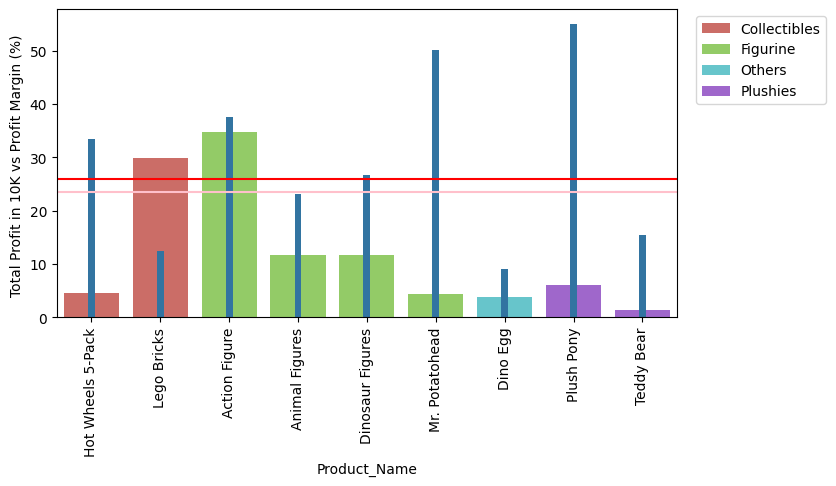

In [ ]:

figurines_data = toys#toys[toys['Product_subcategory'] == 'Figurine']

figurine_stats = figurines_data.groupby(['Product_subcategory','Product_Name']).agg({
    'Product_Price': 'mean',
    'Units': 'sum',
    'Product_Cost': 'mean'}).reset_index()

figurine_stats['Total_Profit_$_10K'] = figurine_stats['Units'] * (figurine_stats['Product_Price'] - figurine_stats['Product_Cost'])/10000
figurine_stats['Profit_Margin'] = (figurine_stats['Product_Price'] - figurine_stats['Product_Cost']) * 100 / figurine_stats['Product_Price']

plt.figure(figsize=(8, 4))
# Barplot on the first axis
sns.barplot(data=figurine_stats, y='Total_Profit_$_10K', x='Product_Name', hue='Product_subcategory', palette='hls')

sns.barplot(data=figurine_stats, y='Profit_Margin', x='Product_Name',width=0.1)
plt.axhline(25.9, color='r')
plt.axhline(23.5, color='pink')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 1))
plt.ylabel("Total Profit in 10K vs Profit Margin (%) ")
plt.show()

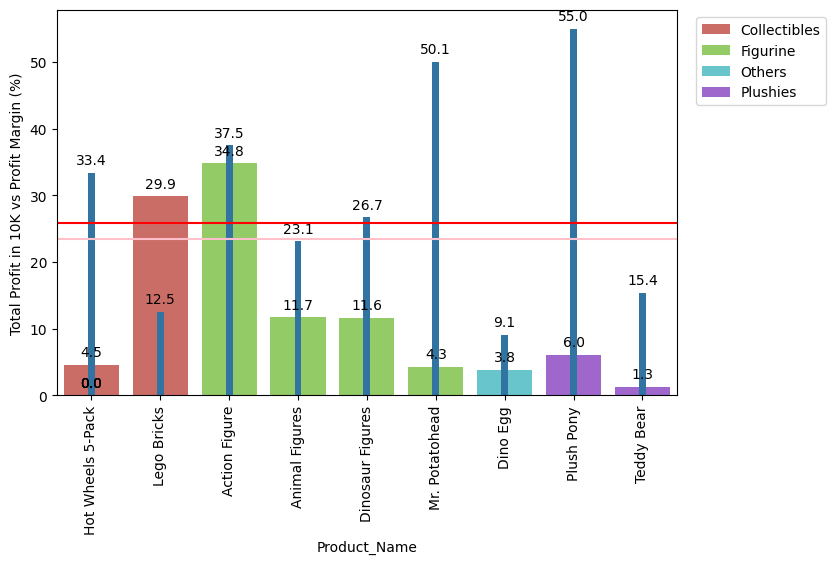

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and plot
plt.figure(figsize=(8, 5))

# Create the first barplot for Total Profit
sns.barplot(data=figurine_stats, y='Total_Profit_$_10K', x='Product_Name', hue='Product_subcategory', palette='hls')

# Create the second barplot for Profit Margin
barplot = sns.barplot(data=figurine_stats, y='Profit_Margin', x='Product_Name', width=0.1)

# Add horizontal lines for reference
plt.axhline(25.9, color='r')
plt.axhline(23.5, color='pink')

# Rotate x-ticks for better visibility
plt.xticks(rotation=90)

# Set up the legend
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Set the y-label
plt.ylabel("Total Profit in 10K vs Profit Margin (%)")

# Annotate each bar with the value of Profit Margin
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                     ha='center', va='center',
                     xytext=(0, 9),  # Text position offset
                     textcoords='offset points')

# Show the plot
plt.show()


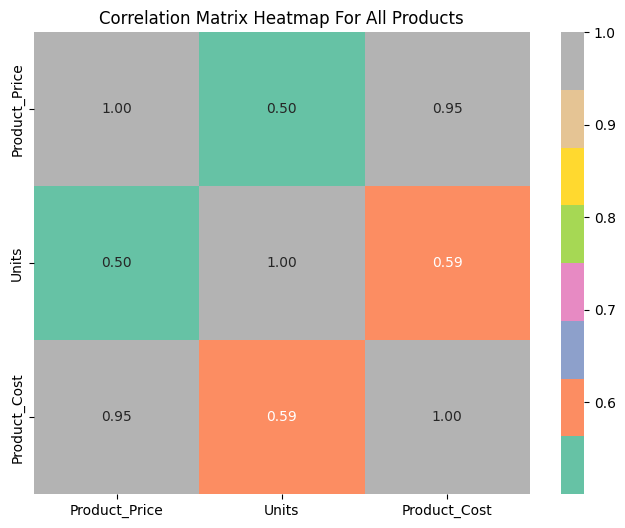

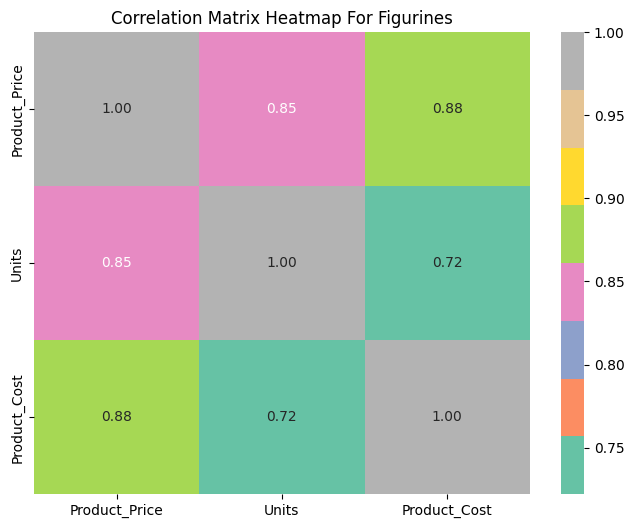

In [ ]:

figurines_data = toys

figurine_stats = figurines_data.groupby('Product_Name').agg({
    'Product_Price': 'mean',
    'Units': 'sum',
    'Product_Cost': 'mean'
}).reset_index()

figurine_stats['Total_Profit_$'] = figurine_stats['Units'] * (figurine_stats['Product_Price'] - figurine_stats['Product_Cost'])
figurine_stats['Profit_Margin'] = (figurine_stats['Product_Price'] - figurine_stats['Product_Cost']) * 100 / figurine_stats['Product_Price']
figurine_stats

correlation_matrix_all = figurine_stats[['Product_Price', 'Units', 'Product_Cost']].corr()



figurines_data =toys[toys['Product_subcategory'] == 'Figurine']

figurine_stats = figurines_data.groupby('Product_Name').agg({
    'Product_Price': 'mean',
    'Units': 'sum',
    'Product_Cost': 'mean'
}).reset_index()

figurine_stats['Total_Profit_$'] = figurine_stats['Units'] * (figurine_stats['Product_Price'] - figurine_stats['Product_Cost'])
figurine_stats['Profit_Margin'] = (figurine_stats['Product_Price'] - figurine_stats['Product_Cost']) * 100 / figurine_stats['Product_Price']
figurine_stats

correlation_matrix_fig = figurine_stats[['Product_Price', 'Units', 'Product_Cost']].corr()

correlation_matrix_all,correlation_matrix_fig

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, fmt=".2f", cmap='Set2', cbar=True)
plt.title('Correlation Matrix Heatmap For All Products')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_fig, annot=True, fmt=".2f", cmap='Set2', cbar=True)
plt.title('Correlation Matrix Heatmap For Figurines')
plt.show()

<ipython-input-88-319676390ea8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-88-319676390ea8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
<ipython-input-88-319676390ea8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
RMSE: 10.712450071313985 
 MAE: 7.868352995528075 
R2 score: 0.004058922211361171


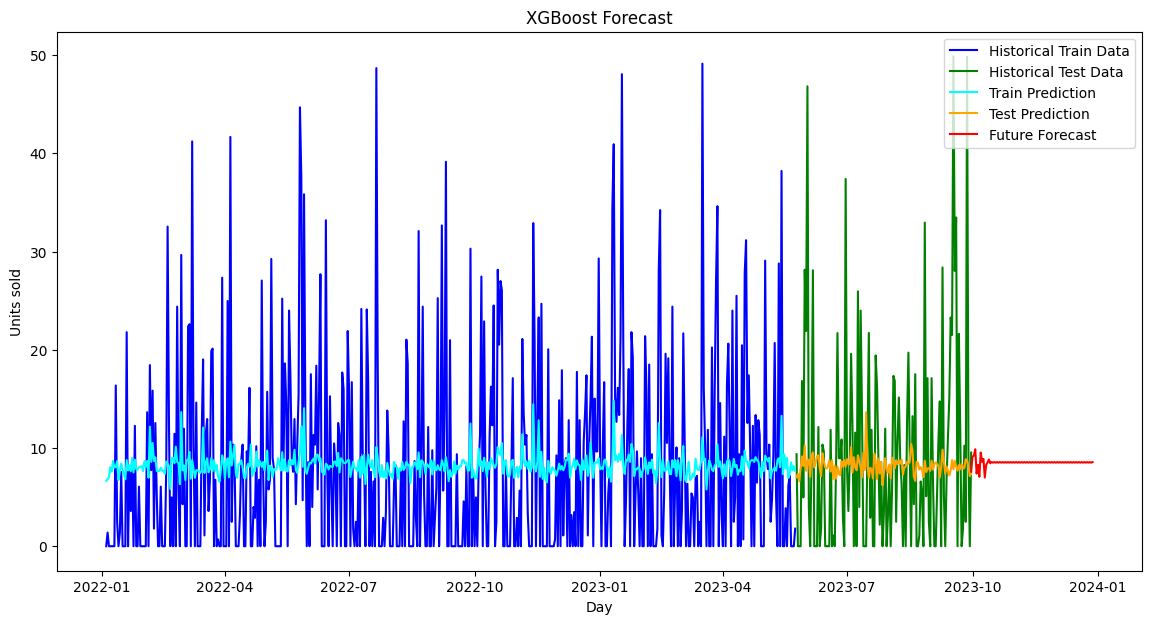

In [ ]:
def r2_score(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    ss_tot = sum((y_i - mean_y) ** 2 for y_i in y_true)
    ss_res = sum((y_i - y_pred_i) ** 2 for y_i, y_pred_i in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_tot)

    return r2

def xgboost_model(data):
  data['Date'] = pd.to_datetime(data['Date'])
  data['Year'] = data['Date'].dt.year
  data['Month'] = data['Date'].dt.month
  data['Day'] = data['Date'].dt.day
  daily_sales = data.groupby('Date')['Units'].sum().reset_index()

  for lag in [1, 2, 3]:
      daily_sales[f'Units_lag_{lag}'] = daily_sales['Units'].shift(lag)

  daily_sales_clean = daily_sales.dropna()


  X = daily_sales_clean[['Units_lag_1', 'Units_lag_2', 'Units_lag_3']]
  y = daily_sales_clean['Units']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [100,75,50,10,150,200]}

    # Setup the grid search
  grid_search = GridSearchCV(
        estimator=XGBRegressor(objective='reg:squarederror'),
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=1
    )
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_

  model = XGBRegressor(objective='reg:squarederror',**best_params)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print('RMSE:', rmse,'\n MAE:',mae,"\nR2 score:",r2)


  data = daily_sales_clean
  future_values = data[['Units_lag_1', 'Units_lag_2', 'Units_lag_3']].iloc[-1].to_numpy()
  future_forecasts = []

  for i in range(90):
      future_temp = model.predict(future_values.reshape(1, -1))[0]
      future_forecasts.append(future_temp)

      future_values = np.roll(future_values, -1)
      future_values[-1] = future_temp

    # Plot results with the new model configuration
  plt.figure(figsize=(14, 7))
  plt.plot(data['Date'][:len(y_train)], y_train, label='Historical Train Data', color='blue')
  plt.plot(data['Date'][len(y_train):(len(y_train) + len(y_test))], y_test, label='Historical Test Data', color='green')
  plt.plot(data['Date'][:len(y_train)], y_train_pred, label='Train Prediction', color='cyan')
  plt.plot(data['Date'][len(y_train):(len(y_train) + len(y_test))], y_pred, label='Test Prediction', color='orange')
  plt.plot(pd.date_range(start=data['Date'].iloc[-1] + pd.DateOffset(weeks=0), periods=90, freq='D'), future_forecasts, label='Future Forecast', color='red')
  plt.title('XGBoost Forecast')
  plt.xlabel('Day')
  plt.ylabel('Units sold')
  plt.legend()
  plt.show()




xgboost_model(toys[toys['Product_Name'] == 'Action Figure'])

<ipython-input-88-319676390ea8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-88-319676390ea8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
<ipython-input-88-319676390ea8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
RMSE: 8.34387479191637 
 MAE: 6.611980312978551 
R2 score: 0.041540227456755674


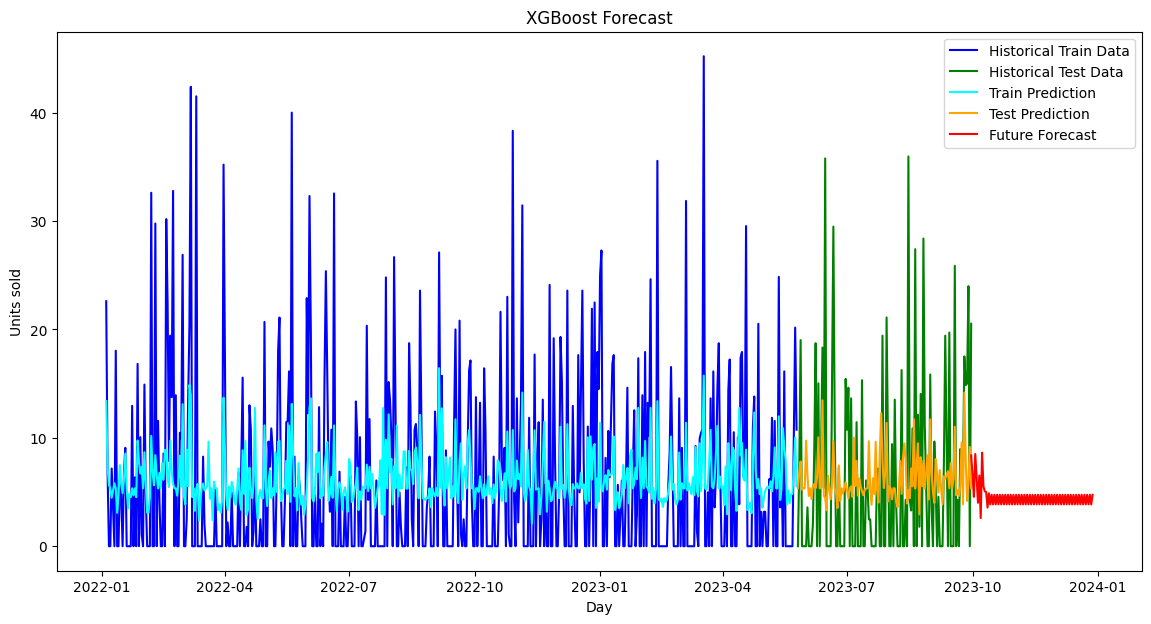

In [ ]:
xgboost_model(toys[toys['Product_Name'] == 'Animal Figures'])

<ipython-input-4-6a4c144d6979>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3d0iub_o/0t7vm5he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3d0iub_o/nf82qbb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44367', 'data', 'file=/tmp/tmp3d0iub_o/0t7vm5he.json', 'init=/tmp/tmp3d0iub_o/nf82qbb7.json', 'output', 'file=/tmp/tmp3d0iub_o/prophet_modelmk88d2bs/prophet_model-2024060516514

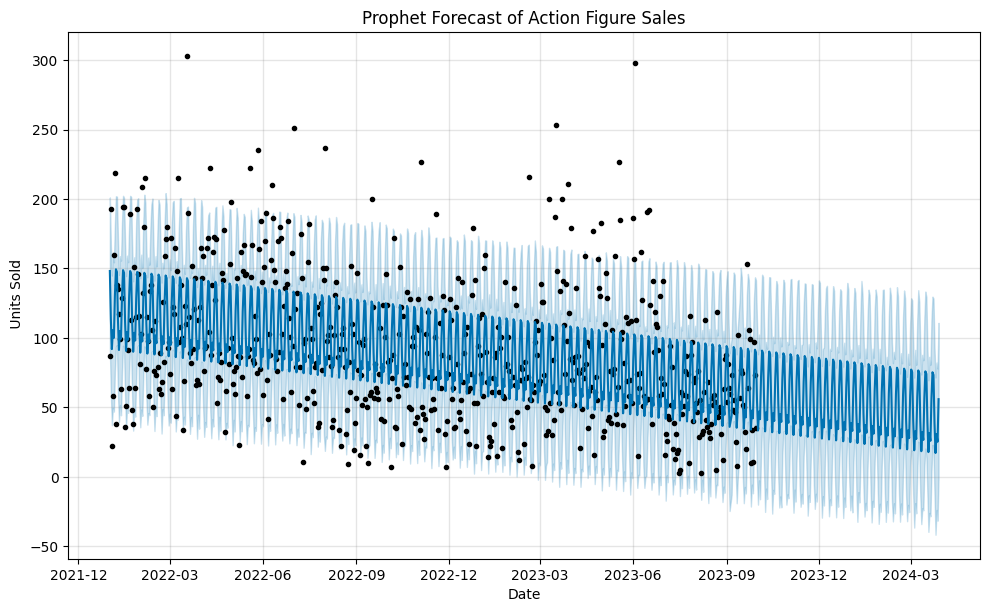

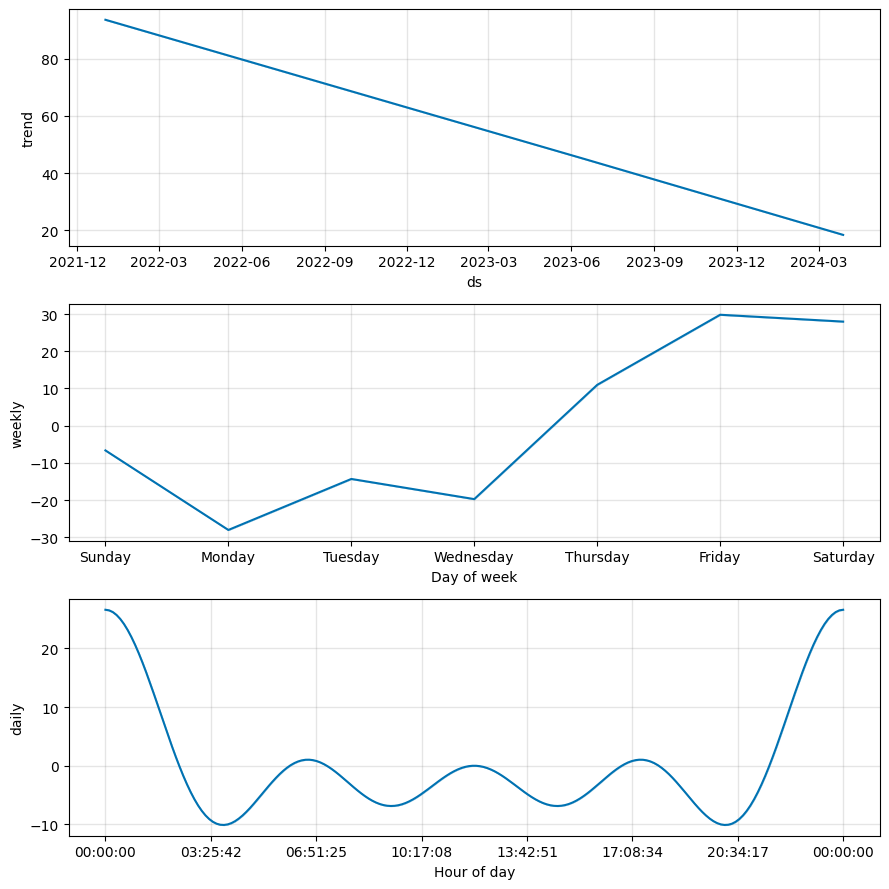

In [4]:
from prophet import Prophet
import math


action_figure_data = toys[toys['Product_Name'].str.contains("Action Figure", case=False)]

action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
action_figure_data = action_figure_data.sort_values(by='Date')

action_figure_daily_sales = action_figure_data.groupby('Date')['Units'].sum().reset_index()


action_figure_daily_sales['Units_capped'] = action_figure_daily_sales['Units']
#.clip(lower=lower_threshold, upper=upper_threshold)


prophet_data = action_figure_daily_sales[['Date', 'Units_capped']].rename(columns={'Date': 'ds', 'Units_capped': 'y'})

prophet_model = Prophet(daily_seasonality=True)

prophet_model.fit(prophet_data)

future_dates = prophet_model.make_future_dataframe(periods=180)

forecast_prophet = prophet_model.predict(future_dates)

fig = prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast of Action Figure Sales')
plt.xlabel('Date')
plt.ylabel(' Units Sold')
plt.show()

fig2 = prophet_model.plot_components(forecast_prophet)


<ipython-input-5-ac099975107c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3d0iub_o/623cd786.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3d0iub_o/0khmtncb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96989', 'data', 'file=/tmp/tmp3d0iub_o/623cd786.json', 'init=/tmp/tmp3d0iub_o/0khmtncb.json', 'output', 'file=/tmp/tmp3d0iub_o/prophet_modelw1609foy/prophet_model-2024060516515

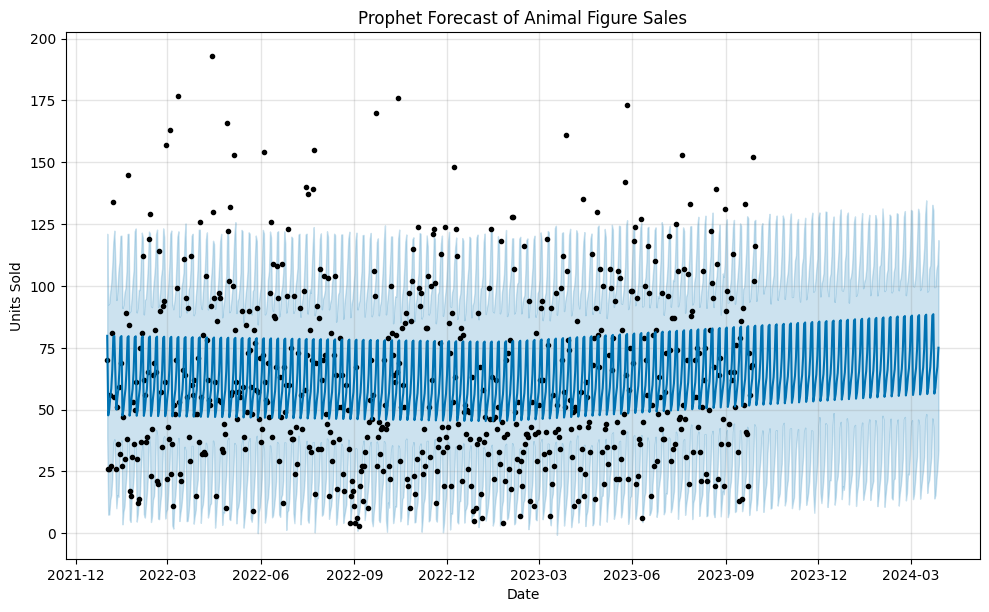

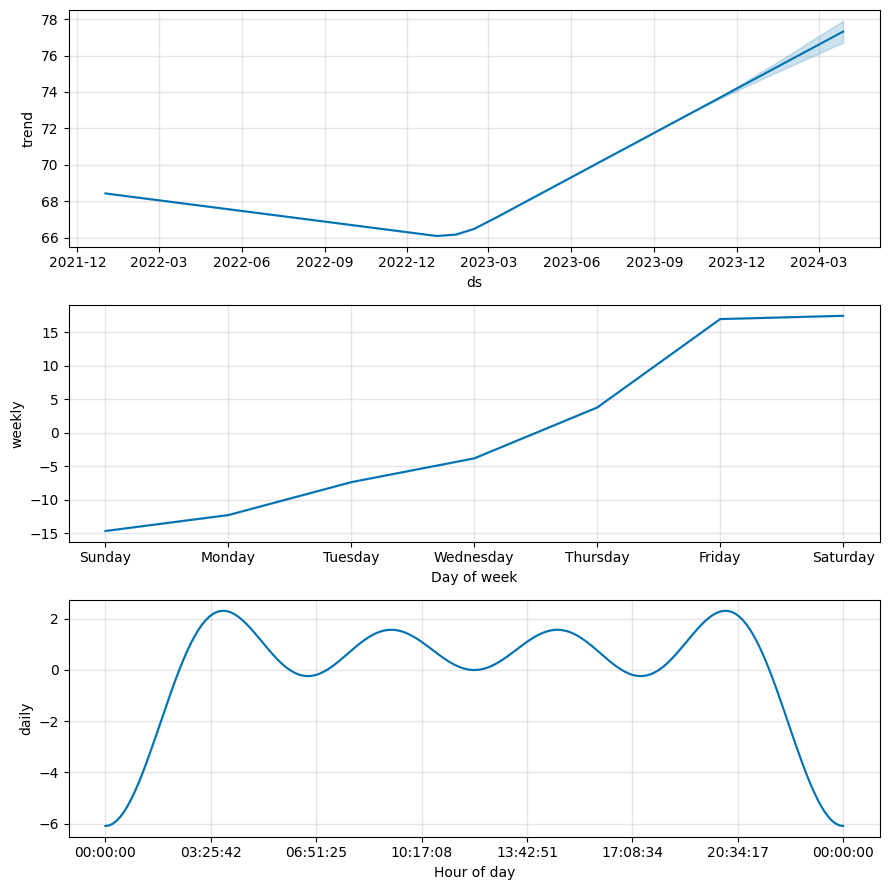

In [5]:
from prophet import Prophet

action_figure_data = toys[toys['Product_Name'].str.contains("Animal Figures", case=False)]

action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
action_figure_data = action_figure_data.sort_values(by='Date')
action_figure_daily_sales = action_figure_data.groupby('Date')['Units'].sum().reset_index()

action_figure_daily_sales['Units_capped'] = action_figure_daily_sales['Units']


prophet_data = action_figure_daily_sales[['Date', 'Units_capped']].rename(columns={'Date': 'ds', 'Units_capped': 'y'})

prophet_model = Prophet(daily_seasonality=True)

prophet_model.fit(prophet_data)

future_dates = prophet_model.make_future_dataframe(periods=180)

forecast_prophet = prophet_model.predict(future_dates)

fig = prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast of Animal Figure Sales')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

fig2 = prophet_model.plot_components(forecast_prophet)


<ipython-input-37-e760b97ac825>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzml51_a4/heihwpmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzml51_a4/cnkf4apt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4182', 'data', 'file=/tmp/tmpzml51_a4/heihwpmo.json', 'init=/tmp/tmpzml51_a4/cnkf4apt.json', 'output', 'file=/tmp/tmpzml51_a4/prophet_model0dgftbxi/prophet_model-2024060508515

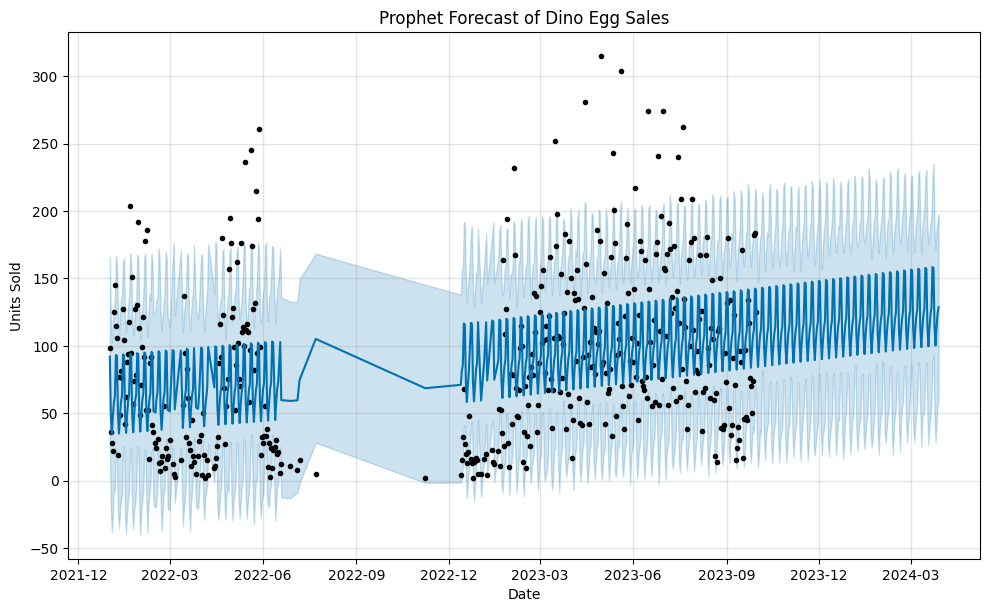

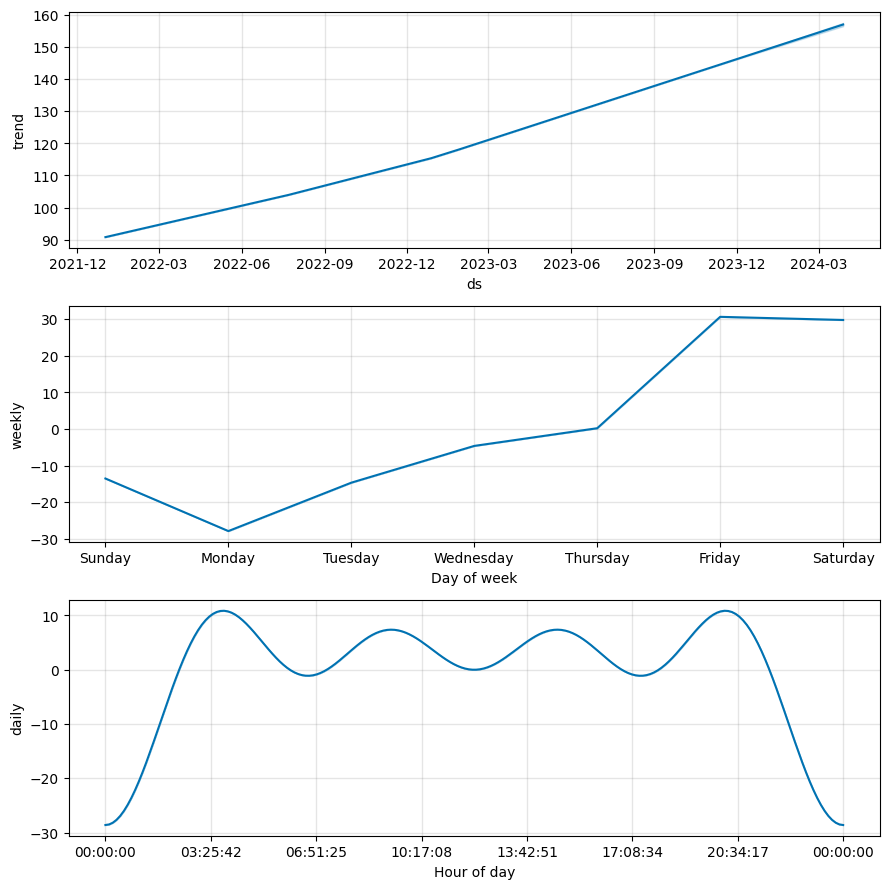

In [ ]:
from prophet import Prophet

action_figure_data = toys[toys['Product_Name'].str.contains("Dino Egg", case=False)]

action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
action_figure_data = action_figure_data.sort_values(by='Date')

action_figure_daily_sales = action_figure_data.groupby('Date')['Units'].sum().reset_index()

action_figure_daily_sales['Units_capped'] = action_figure_daily_sales['Units']


prophet_data = action_figure_daily_sales[['Date', 'Units_capped']].rename(columns={'Date': 'ds', 'Units_capped': 'y'})

prophet_model = Prophet(daily_seasonality=True)

prophet_model.fit(prophet_data)

future_dates = prophet_model.make_future_dataframe(periods=180)

forecast_prophet = prophet_model.predict(future_dates)

fig = prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast of Dino Egg Sales')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

fig2 = prophet_model.plot_components(forecast_prophet)


<ipython-input-45-f776b78fc05b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzml51_a4/87igfuq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzml51_a4/budxz0jw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84542', 'data', 'file=/tmp/tmpzml51_a4/87igfuq2.json', 'init=/tmp/tmpzml51_a4/budxz0jw.json', 'output', 'file=/tmp/tmpzml51_a4/prophet_modelwpb25_8w/prophet_model-2024060508581

RMSE: 43.56154400140174


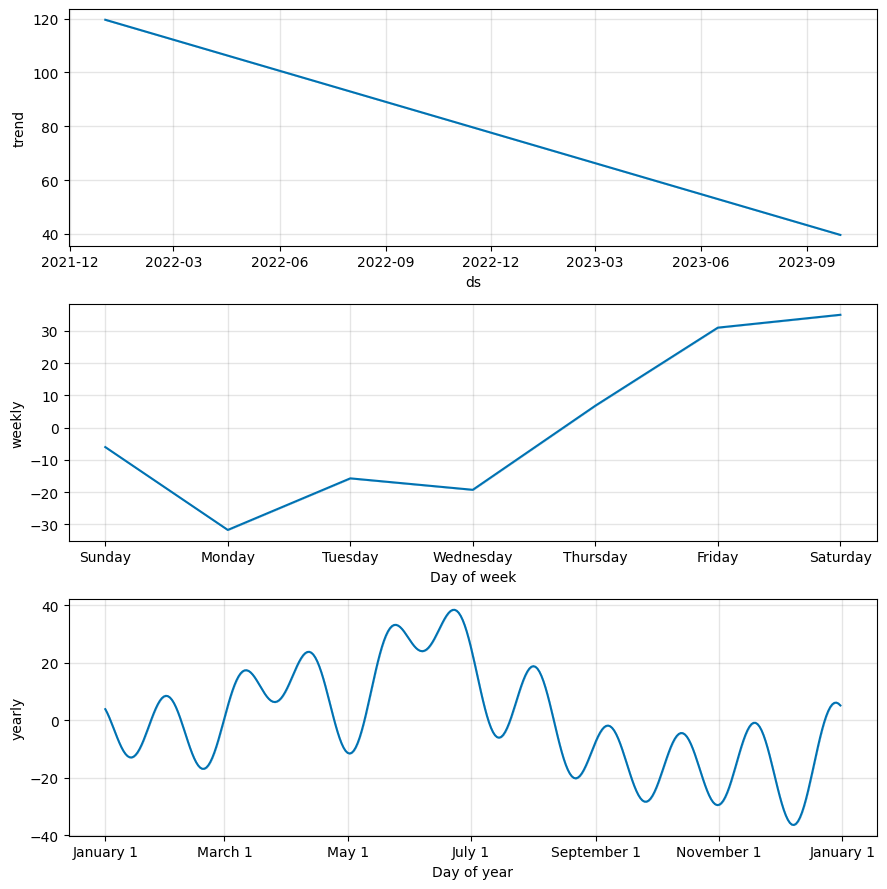

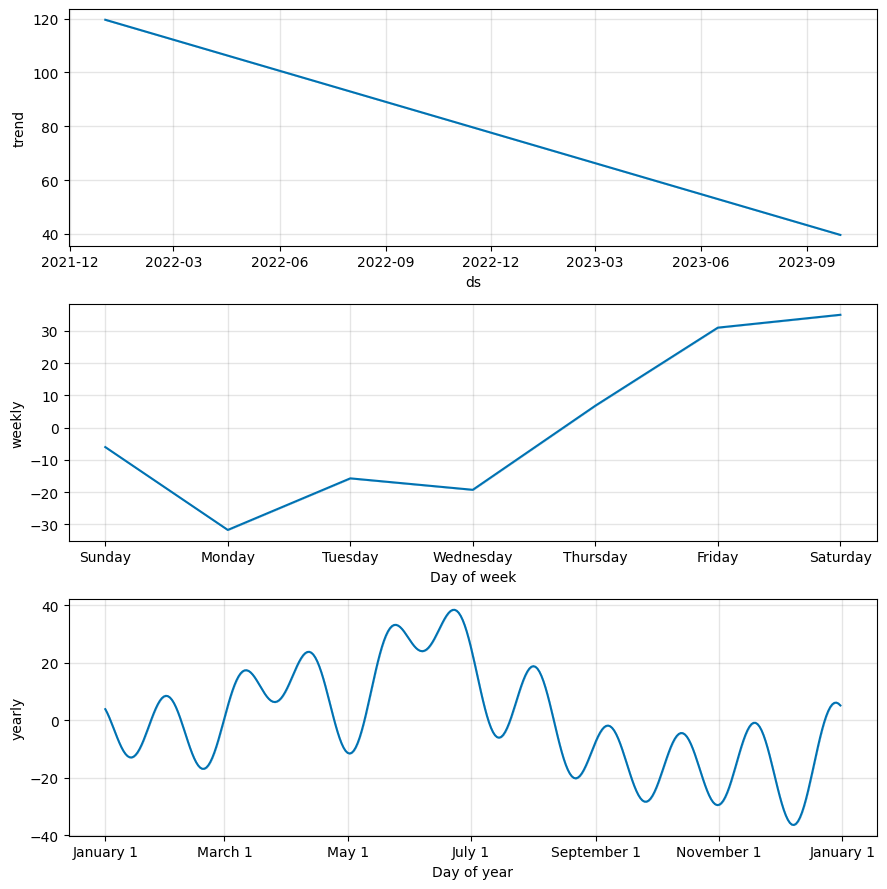

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'toys' dataframe is already loaded and includes 'Date' and 'Units'

# Filter and prepare data
action_figure_data = toys[toys['Product_Name'].str.contains("Action Figure", case=False)]
action_figure_data['Date'] = pd.to_datetime(action_figure_data['Date'])
action_figure_data = action_figure_data.sort_values(by='Date')
action_figure_daily_sales = action_figure_data.groupby('Date')['Units'].sum().reset_index()

# Creating capped Units column (assuming you might want to apply limits)
lower_threshold = 0
upper_threshold = np.max(action_figure_daily_sales['Units'])  # adjust this as needed
action_figure_daily_sales['Units_capped'] = action_figure_daily_sales['Units'].clip(lower=lower_threshold, upper=upper_threshold)

# Preparing data for Prophet
prophet_data = action_figure_daily_sales[['Date', 'Units_capped']].rename(columns={'Date': 'ds', 'Units_capped': 'y'})

# Split data into training and testing
split_date = prophet_data['ds'].max() - pd.Timedelta(days=395)  # adjust split date as needed
train_data = prophet_data[prophet_data['ds'] <= split_date]
test_data = prophet_data[prophet_data['ds'] > split_date]

# Initialize and fit the Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train_data)
# Correct number of periods to generate enough future dates
num_days_to_predict = (test_data['ds'].max() - train_data['ds'].max()).days
future_dates = prophet_model.make_future_dataframe(periods=num_days_to_predict)

# Generate predictions
forecast_prophet = prophet_model.predict(future_dates)

# Ensure predictions cover the test set
forecast_test = forecast_prophet[forecast_prophet['ds'].isin(test_data['ds'])]

# Check if the length matches
if len(forecast_test) == len(test_data):
    rmse = math.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))
    print(f"RMSE: {rmse}")
else:
    print("Mismatch in the number of predicted and actual values.")
    print(f"Expected {len(test_data)} predictions, got {len(forecast_test)}.")

# Plotting can proceed as previously coded
prophet_model.plot_components(forecast_prophet)

In [ ]:
import pyrsm as rsm